# A prismatic cantilever beam under a tip load

This is an example of the geometrically-exact beam structural solver in SHARPy.

Reference:
Simpson R.J.S., Palacios R., “Numerical Aspects of Nonlinear Flexible Aircraft Flight Dynamics Modeling.” 54th AIAA/ASME/ASCE/AHS/ASC Structures, Structural Dynamics and Materials Conference, 8-11 April 2013, Boston, Massachusetts, USA [http://hdl.handle.net/10044/1/11077, http://dx.doi.org/10.2514/6.2013-1634]

## Required Packages

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sharpy.sharpy_main                # used to run SHARPy from Jupyter
import model_static_cantilever as model  # model definition
from IPython.display import Image

plt.rcParams.update({'font.size': 20})   # Large fonts in all plots

## Problem 1: Tip vertical dead load
Consider first a massless beam with a heavy tip mass, such that the deformations are due to the resulting dead load P. The static equilibrium will be obtained for multiple values of P=0, 100, ..., 1000 kN

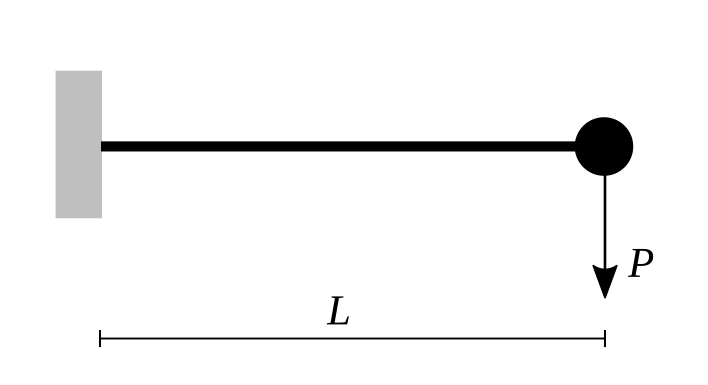

In [2]:
Image('images/cantilever.png', width=500)

In [3]:
# Define temporary files to generate sharpy models.
case_name= 'temp'
route = './'

Nforces=10         # Number of force steps
DeltaForce=100e3 # Increment of forces
Nelem=20          # Number of beam elements

N=2*Nelem+1
x1=np.zeros((Nforces,N))
z1=np.zeros((Nforces,N))

#Loop through all external forces
for jForce in range(Nforces):
    model.clean_test_files(route, case_name)
    model.generate_fem_file(route, case_name, Nelem, float(jForce+1)*DeltaForce)
    model.generate_solver_file(route,case_name)

    case_data=sharpy.sharpy_main.main(['', route + case_name + '.sharpy'])

    x1[jForce,0:N]=case_data.structure.timestep_info[0].pos[:, 0]
    z1[jForce,0:N]=case_data.structure.timestep_info[0].pos[:, 2]

#Store initial geometry
x0=case_data.structure.ini_info.pos[:, 0]
z0=case_data.structure.ini_info.pos[:, 2]

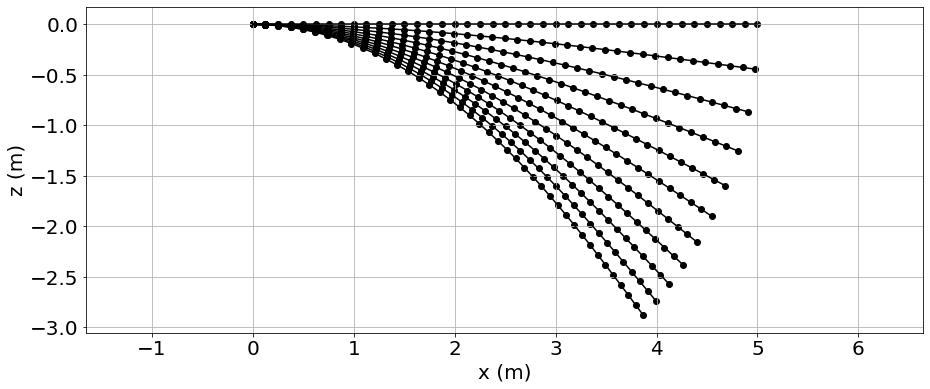

In [4]:
# Plot the deformed beam shapes
fig= plt.subplots(1, 1, figsize=(15, 6))
plt.scatter(x0,z0,c='black')
plt.plot(x0,z0,c='black')

for jForce in range(Nforces):
    plt.scatter(x1[jForce,0:N],z1[jForce,0:N],c='black')
    plt.plot(x1[jForce,0:N],z1[jForce,0:N],c='black')

plt.axis('equal')
plt.grid()
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.savefig("images/ncb1-dead-displ.eps",  format='eps', dpi=1000, bbox_inches='tight')

In [5]:
print('{:>8s}{:>12s}'.format('Force','Tip z'))
dash=20*'-'; print(dash)
for jForce in range(Nforces):
    print('{:>8.0f}{:>12.4f}'.format((jForce+1)*DeltaForce,z1[jForce,N-1]))

   Force       Tip z
--------------------
  100000     -0.4438
  200000     -0.8672
  300000     -1.2551
  400000     -1.5999
  500000     -1.9005
  600000     -2.1597
  700000     -2.3824
  800000     -2.5737
  900000     -2.7386
 1000000     -2.8813


In [6]:
model.clean_test_files(route, case_name)

## Problem 2: Comparing follower and dead forces

In [7]:
#Loop through all external follower forces, again applied at the tip.
x2=np.zeros((Nforces,N))
z2=np.zeros((Nforces,N))
for jForce in range(Nforces):
    model.clean_test_files(route, case_name)
    model.generate_fem_file(route, case_name, Nelem, 0, -float(jForce+1)*DeltaForce)
    model.generate_solver_file(route,case_name)

    case_foll=sharpy.sharpy_main.main(['', route + case_name + '.sharpy'])

    x2[jForce,0:N]=case_foll.structure.timestep_info[0].pos[:, 0]
    z2[jForce,0:N]=case_foll.structure.timestep_info[0].pos[:, 2]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


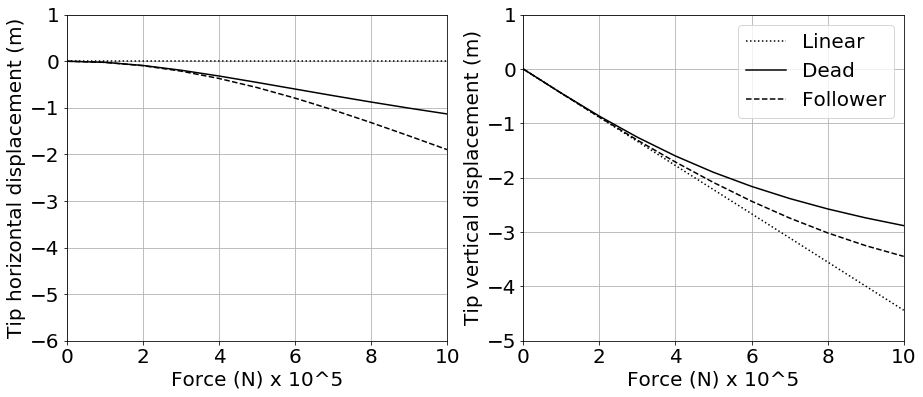

In [8]:
#Plot results.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax0 = axs[0]
ax0.plot([0,Nforces],[0, 0],linestyle=':', c='black')
ax0.plot(range(Nforces+1), np.concatenate((5, x1[0:Nforces,-1]), axis=None)-5*np.ones(Nforces+1),linestyle='-', c='black')
ax0.plot(range(Nforces+1), np.concatenate((5, x2[0:Nforces,-1]), axis=None)-5*np.ones(Nforces+1),linestyle='--', c='black')
#ax0.axis('equal')
ax0.grid()
ax0.set_xlabel('Force (N) x 10^5')
ax0.set_ylabel('Tip horizontal displacement (m)')
ax0.set(xlim=(0, Nforces), ylim=(-6, 1))

ax1 = axs[1]
ax1.plot([0,Nforces],np.concatenate((0, z1[0,-1]*Nforces), axis=None),linestyle=':', c='black')
ax1.plot(range(Nforces+1), np.concatenate((0, z1[0:Nforces,-1]), axis=None),linestyle='-', c='black')
ax1.plot(range(Nforces+1), np.concatenate((0, z2[0:Nforces,-1]), axis=None),linestyle='--', c='black')
    
    
#ax1.axis('equal')
ax1.grid()
ax1.set_xlabel('Force (N) x 10^5')
ax1.set_ylabel('Tip vertical displacement (m)')
ax1.set(xlim=(0, Nforces), ylim=(-5, 1))

ax1.legend(['Linear','Dead','Follower'])

fig.savefig("images/ncb1-foll-displ.eps", format='eps', dpi=1000, bbox_inches="tight")

In [9]:
model.clean_test_files(route, case_name)